# Wprowadzenie do Deep Learning

Deep learning czerpie inspiracjƒô z biologii, ale dzia≈Ça dziƒôki matematyce,
statystyce i szybkim obliczeniom numerycznym. Poni≈ºej znajdziesz kr√≥tki
przeglƒÖd podstaw, od pojedynczego neuronu po ca≈Çy proces uczenia siƒô sieci.

## Neuron

### Neuron w biologii

Neuron biologiczny sk≈Çada siƒô z dendryt√≥w odbierajƒÖcych sygna≈Ç, cia≈Ça
kom√≥rkowego (soma), kt√≥re go przetwarza, oraz aksonu przesy≈ÇajƒÖcego impuls
do kolejnych kom√≥rek. Po≈ÇƒÖczenia synaptyczne modulujƒÖ si≈Çƒô przekazywanego
sygna≈Çu (potencja≈Ç postsynaptyczny), co pozwala m√≥zgowi adaptowaƒá siƒô i
uczyƒá na podstawie do≈õwiadcze≈Ñ.


<figure style="text-align: center;">
  <img src="../_img/neuron.png" width="400">
  <figcaption>Uproszczona budowa neuronu</figcaption>
</figure>



### Neuron w informatyce

Sztuczny neuron modeluje dzia≈Çanie neuronu biologicznego poprzez wa≈ºonƒÖ sumƒô
wej≈õƒá i funkcjƒô aktywacji. Dla wektora wej≈õciowego `x` i wag `w` mo≈ºemy to opisaƒá r√≥wnaniem:

$$
z = w \cdot x + b
$$

gdzie:

* $z$ ‚Äì to ≈ÇƒÖczna pobudka (**potencja≈Ç**) neuronu, czyli suma wa≈ºona wej≈õƒá plus bias.
  Jest to warto≈õƒá przed zastosowaniem funkcji aktywacji. $z$ mo≈ºna traktowaƒá jako ‚Äûsurowy sygna≈Ç‚Äù, kt√≥ry jeszcze musi przej≈õƒá przez nieliniowo≈õƒá, aby neuron wyda≈Ç ostatecznƒÖ odpowied≈∫ (np. ‚Äûaktywny‚Äù lub ‚Äûnieaktywny‚Äù).

* $w$ ‚Äì to **wektor wag** przypisanych do wej≈õƒá, okre≈õlajƒÖcych, jak silny wp≈Çyw ma dana cecha na wynik neuronu:
$$
w = [w_1, w_2, \dots, w_n]
$$

* $x$ ‚Äì to **wektor wej≈õciowy** neuronu, czyli zestaw sygna≈Ç√≥w (cech) wchodzƒÖcych do neuronu.
  * Przyk≈Çad: dla obrazu ka≈ºdy piksel mo≈ºe byƒá jednƒÖ cechƒÖ wej≈õciowƒÖ, dla danych tabelarycznych cechami mogƒÖ byƒá kolumny (wiek, doch√≥d, lokalizacja).
  * Je≈õli neuron ma wiele wej≈õƒá, `x` zapisujemy jako wektor:
$$
x = [x_1, x_2, \dots, x_n]
$$

* $b$ to **Bias** dzia≈Ça jak wyraz wolny w r√≥wnaniu liniowym i pozwala przesunƒÖƒá punkt aktywacji (pr√≥g pobudzenia).


Nastƒôpnie przepuszczamy wynik przez nieliniowƒÖ **funkcjƒô aktywacji**. Mo≈ºemy to zobrazowaƒá na poni≈ºszym schemacie:

<figure style="text-align: center;">
    
```mermaid
flowchart LR
    x1["x‚ÇÅ"] -->|w‚ÇÅ| N["z = w¬∑x + b"]
    x2["x‚ÇÇ"] -->|w‚ÇÇ| N
    x3["x‚ÇÉ"] -->|w‚ÇÉ| N
    b["bias b"] --> N
    N -->|z| A["œÉ(z) - Funkcja aktywacji"]
    A --> y["Wyj≈õcie a"]

    style N fill:#fff,stroke:#000,stroke-width:2px
    style A fill:#f9f,stroke:#000,stroke-width:2px
```

<figcaption>Schemat dzia≈Çnia neuronu</figcaption>
</figure>


* **Funkcja aktywacji** wprowadza nieliniowo≈õƒá, dziƒôki kt√≥rej sieƒá mo≈ºe uczyƒá siƒô z≈Ço≈ºonych zale≈ºno≈õci, a nie tylko prostych kombinacji liniowych. Bez niej sieƒá neuronowa by≈Çaby r√≥wnowa≈ºna pojedynczej regresji liniowej ‚Äì niezale≈ºnie od liczby warstw.

* **Najpopularniejsze funkcje aktywacji**:

  * **Sigmoida**:
    $$
    \sigma(z) = \frac{1}{1+e^{-z}}
    $$
    ≈õciska warto≈õci do przedzia≈Çu (0,1). Dobrze nadaje siƒô do modelowania prawdopodobie≈Ñstwa, ale cierpi na problem ‚ÄûzanikajƒÖcego gradientu‚Äù przy du≈ºych warto≈õciach dodatnich i ujemnych.

  * **tanh**:
    $$
    \tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}
    $$
    warto≈õci w przedziale (-1, 1). Zwykle lepsza ni≈º sigmoida, bo ma warto≈õci znormalizowane wok√≥≈Ç zera, co u≈Çatwia uczenie.

  * **ReLU (Rectified Linear Unit)**:
    $$
    \text{ReLU}(z) = \max(0, z)
    $$
    najczƒô≈õciej u≈ºywana we wsp√≥≈Çczesnych sieciach, prosta i skuteczna, ale mo≈ºe powodowaƒá ‚Äûmartwe neurony‚Äù (je≈õli gradient zeruje siƒô dla warto≈õci < 0).

  * **Leaky ReLU / ELU / GELU** ‚Äì modyfikacje ReLU, kt√≥re rozwiƒÖzujƒÖ czƒô≈õƒá problem√≥w, np. martwych neuron√≥w.

* **Wyb√≥r funkcji aktywacji** zale≈ºy od kontekstu:

  * w warstwach ukrytych najczƒô≈õciej stosuje siƒô **ReLU lub jej odmiany**,
  * w warstwie wyj≈õciowej stosuje siƒô funkcjƒô dopasowanƒÖ do zadania, np.

    * **sigmoidƒô** przy klasyfikacji binarnej,
    * **softmax** przy klasyfikacji wieloklasowej,
    * brak funkcji aktywacji (warstwa liniowa) przy regresji.




## Perceptron

Opisany przez Rosenblatta w 1958 roku to pojedy≈Ñczy neuron z wagami i biasem oraz funkcj aktyuwacji progowej

U≈ºywany do rozwiƒÖzywania prostych problem√≥w klasyfikacyjnych liniowo separowalnych.

### Przyk≈Çad intuicyjny (2D):

Mamy punkty nale≈ºƒÖce do klasy A (np. oznaczone jako niebieskie k√≥≈Çka) i klasy B (np. czerwone krzy≈ºyki).

Je≈õli da siƒô narysowaƒá prostƒÖ liniƒô tak, ≈ºe wszystkie niebieskie k√≥≈Çka sƒÖ po jednej stronie, a wszystkie czerwone krzy≈ºyki po drugiej ‚Äî to problem jest liniowo separowalny.

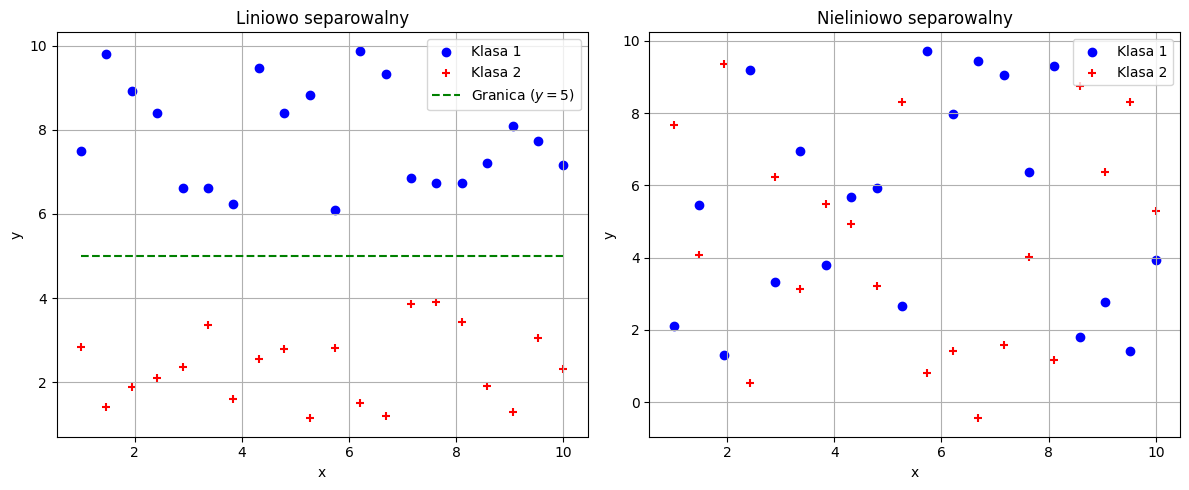

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

# --- wsp√≥lne x ---
x = np.linspace(1, 10, 20)

# --- 1. Separowalny ---
y1 = np.random.uniform(6, 10, size=len(x))   # klasa 1 wysoko
y2 = np.random.uniform(1, 4, size=len(x))    # klasa 2 nisko

# --- 2. Nieseparowalny ---
y1_nl = np.random.uniform(1, 10, size=len(x))   # losowe punkty
mask = y1_nl > 5                                # klasyfikacja wg progu
y2_nl = 10 - y1_nl + np.random.uniform(-1, 1, size=len(x))  # odbicie + szum

# --- Rysowanie ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# (a) Separowalny
axes[0].scatter(x, y1, label="Klasa 1", color="blue", marker="o")
axes[0].scatter(x, y2, label="Klasa 2", color="red", marker="+")
axes[0].plot([1, 10], [5, 5], "g--", label="Granica ($y=5$)")
axes[0].set_title("Liniowo separowalny")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].legend()
axes[0].grid(True)

# (b) Nieseparowalny
axes[1].scatter(x, y1_nl, label="Klasa 1", color="blue", marker="o")
axes[1].scatter(x, y2_nl, label="Klasa 2", color="red", marker="+")
axes[1].set_title("Nieliniowo separowalny")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()



Formalnie dla perceptrony mamy:

$$
z = w \cdot x + b
$$

$$
y = f(z)
$$

gdzie $f(z)$ to jaka≈õ nieliniowa funkcja. Np:

$$
f(z) = \begin{cases}
1 & \text{gdy } z \geq 0 \\
0 & \text{gdy } z < 0
\end{cases}
$$


W dalszej czƒô≈õci wykorzystamy PerceptronowƒÖ sieƒá do tego by przedstawiƒá kilka koncepcji zwiƒÖzanych z uczeniem maszynowym. 



## Sieƒá neuronowa

Sieƒá neuronowa to z≈Ço≈ºenie wielu neuron√≥w u≈Ço≈ºonych w warstwy.

* **Warstwa wej≈õciowa** odbiera dane.
* **Warstwy ukryte** tworzƒÖ coraz bardziej abstrakcyjne reprezentacje.
* **Warstwa wyj≈õciowa** generuje prognozƒô (klasƒô, warto≈õƒá liczbowƒÖ, wektor cech).

<figure style="text-align: center;">
  <img src="../_img/siec_neuronowa.svg" width="400">
  <figcaption>Uproszczony schemat prostej jednokierunkowej, gƒôstej sieci neuronowej. Od lewej warstwa wej≈õciowa, warstwa ukryta, warstwa wyj≈õciowa</figcaption>
</figure>


W praktyce wykorzystujemy r√≥≈ºne architektury, zale≈ºnie od problemu:

* **Single-Layer Perceptron (SLP)**
  * Sieƒá, w kt√≥rej jest tylko **jedna warstwa wyj≈õciowa** z perceptron√≥w.
  * Mo≈ºe mieƒá wiele neuron√≥w, ale nadal dzia≈Ça tylko liniowo + pr√≥g.
  * Ograniczenie: nie rozwiƒÖzuje problem√≥w nieliniowych (np. XOR).

* **MLP (Multilayer Perceptron)** ‚Äì uniwersalna sieƒá gƒôsto po≈ÇƒÖczona
  * To ju≈º **wielowarstwowa gƒôsta sieƒá neuronowa**, czyli kilka warstw perceptron√≥w (dzisiaj z nieliniowymi aktywacjami: sigmoid, ReLU itp.).
  * Dziƒôki warstwom ukrytym mo≈ºe uczyƒá siƒô nieliniowych zale≈ºno≈õci.
  * W praktyce, gdy m√≥wimy ‚Äû**gƒôsta sieƒá neuronowa**‚Äù ‚Äì czƒôsto mamy na my≈õli w≈Ça≈õnie MLP.
  * MLP sƒÖ **uniwersalnymi aproksymatorami** ‚Äì oznacza to, ≈ºe przy odpowiedniej liczbie neuron√≥w i warstw mogƒÖ odwzorowaƒá dowolnƒÖ funkcjƒô ciƒÖg≈ÇƒÖ z zadanƒÖ dok≈Çadno≈õciƒÖ.

* **Sparsely Connected Networks**
  * Sieci o rzadkich po≈ÇƒÖczeniach ‚Äì nie ka≈ºdy neuron ≈ÇƒÖczy siƒô z ka≈ºdym kolejnym.
  * Dziƒôki temu liczba wag jest mniejsza, co redukuje koszty obliczeniowe.
  * W praktyce wiele nowoczesnych sieci stosuje takie podej≈õcie.

* **CNN (Convolutional Neural Network)**
  * ≈öwietne do obraz√≥w i danych o strukturze przestrzennej.
  * Ka≈ºdy neuron ‚Äûwidzi‚Äù tylko fragment wej≈õcia (tzw. receptive field).
  * To przyk≈Çad niegƒôstych po≈ÇƒÖcze≈Ñ ‚Äì np. filtr 3√ó3 nie ≈ÇƒÖczy siƒô ze wszystkimi pikselami obrazu, tylko z ma≈Çym obszarem.
  * Czƒôsto zawierajƒÖ te≈º warstwy pooling, kt√≥re zmniejszajƒÖ rozdzielczo≈õƒá i u≈ÇatwiajƒÖ wychwytywanie istotnych cech.

* **RNN (Recurrent Neural Network)**
  * Idea: sieƒá ‚Äûzapƒôtla siƒô w czasie‚Äù ‚Äì wynik z poprzedniego kroku jest podawany jako wej≈õcie do kolejnego.
  * Zaleta: prosta koncepcja, dobrze nadaje siƒô do kr√≥tkich sekwencji.
  * Problem: *zanikajƒÖcy/explodujƒÖcy gradient* ‚Äì im d≈Çu≈ºsza sekwencja, tym trudniej uczyƒá zale≈ºno≈õci odleg≈Çych w czasie.
  * Zastosowania: kr√≥tkie sekwencje, proste modele jƒôzykowe (ale dzi≈õ rzadko u≈ºywane samodzielnie).

* **LSTM (Long Short-Term Memory)**
  * Rozwiniƒôcie RNN wprowadzone przez Hochreitera i Schmidhubera (1997).
  * Kluczowa innowacja: kom√≥rka pamiƒôci + bramki (input, forget, output), kt√≥re sterujƒÖ tym, co zapamiƒôtaƒá, co zapomnieƒá i co przekazaƒá dalej.
  * Zaleta: potrafi przechowywaƒá informacje przez d≈Çugie odcinki sekwencji ‚Üí radzi sobie z problemem zanikajƒÖcego gradientu.
  * Zastosowania: analiza jƒôzyka, t≈Çumaczenie maszynowe, modele czasowe (prognozowanie szereg√≥w).

* **GRU (Gated Recurrent Unit)**
  * Powsta≈Ça p√≥≈∫niej (2014) jako uproszczenie LSTM.
  * Mniej bramek (update gate, reset gate) ‚Üí mniej parametr√≥w ni≈º LSTM, szybsze trenowanie.
  * Czƒôsto daje podobnƒÖ jako≈õƒá jak LSTM, ale jest prostsza obliczeniowo.
  * Zastosowania: podobne do LSTM, czƒôsto u≈ºywana tam, gdzie liczy siƒô szybko≈õƒá.

* **Transformery**
  * Obecnie dominujƒÖce w NLP (przetwarzanie jƒôzyka naturalnego) i coraz czƒô≈õciej w wizji komputerowej.
  * U≈ºywajƒÖ mechanizmu attention, kt√≥ry nie jest pe≈Çnym po≈ÇƒÖczeniem warstw w klasycznym sensie, tylko wa≈ºonym dostƒôpem do wybranych element√≥w sekwencji.
  * Transformery zastƒÖpi≈Çy RNN w NLP, bo lepiej radzƒÖ sobie z d≈Çugimi zale≈ºno≈õciami w sekwencjach.

---

## Jak dzia≈Ça i uczy siƒô perceptron ‚Äî najprostszy przypadek

### 1. Propagacja w prz√≥d (*forward propagation*)

Dla danego wektora wej≈õciowego $ x = (x_1, x_2, \dots, x_n) $ obliczamy warto≈õƒá liniowƒÖ:

$$
z = w \cdot x + b = \sum_i w_i x_i + b
$$

gdzie:

* $ w_i $ ‚Äî waga przy wej≈õciu $x_i$,
* $ b $ ‚Äî bias (przesuniƒôcie).

Na tƒô sumƒô nak≈Çadamy **funkcjƒô aktywacji**.
W klasycznym perceptronie jest to funkcja progowa (*unit step*):

$$
\hat{y} =
\begin{cases}
1 & \text{je≈õli } z \ge 0 \\
0 & \text{je≈õli } z < 0
\end{cases}
$$

Wynik $\hat{y}$ to przewidywana etykieta klasy.

---

### 2. Por√≥wnanie z prawdziwƒÖ etykietƒÖ

Sprawdzamy, czy przewidywanie $\hat{y}$ zgadza siƒô z warto≈õciƒÖ rzeczywistƒÖ $y$:

* je≈õli tak ‚Äî nie zmieniamy wag,
* je≈õli nie ‚Äî musimy je skorygowaƒá.

---

### 3. Korekcja b≈Çƒôd√≥w (aktualizacja wag)

Definiujemy **b≈ÇƒÖd klasyfikacji**:

$$
e = y - \hat{y}
$$

Je≈ºeli $e \neq 0$, modyfikujemy wagi wed≈Çug regu≈Çy:

$$
w \leftarrow w + \eta \cdot e \cdot x
$$

$$
b \leftarrow b + \eta \cdot e
$$

gdzie $\eta$ to wsp√≥≈Çczynnik uczenia (*learning rate*).

**Intuicja**:

* Je≈õli perceptron ≈∫le zaklasyfikowa≈Ç pr√≥bkƒô, przesuwamy granicƒô decyzyjnƒÖ w jej stronƒô.
* Dziƒôki temu zwiƒôkszamy szansƒô, ≈ºe nastƒôpnym razem bƒôdzie poprawnie.

**Przyk≈Çad**:

Za≈Ç√≥≈ºmy:

* wej≈õcie: $x = (2, 3)$,
* wyj≈õcie to: 1
* wagi: $w = (0.5, -1)$,
* bias $b = 0$,
* nieliniowo≈õƒá to funkcja progowa

$$
z = w \cdot x + b 
$$

$$
z = (0.5, -1) \cdot (2, 3) + 0 = 0.5 \cdot 2 + (-1) \cdot 3 = 1 - 3 = -2
$$

$$
\hat{y} = 0
$$


$$
e = y - \hat{y} = 1 - 0 = 1
$$

(czyli perceptron przewidzia≈Ç 0, a powinien 1).

* $\eta = 0.1$,

Aktualizacja:

$$
w \leftarrow (0.5, -1) + 0.1 \cdot 1 \cdot (2, 3) = (0.5, -1) + (0.2, 0.3) = (0.5+0.2, -1+0.3) = (0.7, -0.7)
$$

Czyli **obie wagi zosta≈Çy podniesione**, bo chcemy ‚ÄûprzesunƒÖƒá‚Äù granicƒô decyzyjnƒÖ w stronƒô tej pr√≥bki.

Sprawd≈∫my wiƒôc:

$$
z = (0.7, 0.7) \cdot (2, 3) + 0 = 0.7 \cdot 2 + 0.7 \cdot 3 = 1.4 + 2.1 = 3.5
$$

$$
\hat{y} = 1
$$


---

### 4. Iteracja w epokach

Proces przedstawiony powy≈ºej stosujemy dla ka≈ºdego przyk≈ÇƒÖdu uczƒÖcego (dla wszystkich danych). Jedno takie przej≈õcie to tzw. epoka (ang. _epoch_)

Powtarzamy ten proces wielokrotnie. 

* Je≈õli dane sƒÖ **liniowo separowalne**, perceptron **zawsze** znajdzie hiperp≈Çaszczyznƒô, kt√≥ra poprawnie rozdziela klasy.
* Je≈õli nie ‚Äî proces bƒôdzie siƒô waha≈Ç i nigdy nie dojdzie do pe≈Çnego rozwiƒÖzania.

## Prosty przyk≈Çad - implementacja klasyfikatora opartego o model Perceptronu

Za≈Ç√≥≈ºmy, ≈ºe mamy dane dotyczƒÖce owoc√≥w ‚Äì ich **masy** i **≈õrednicy**.

| Masa | ≈örednica | Owoc       |
| ---- | -------- | ---------- |
| 130  | 7        | jab≈Çko     |
| 150  | 8        | jab≈Çko     |
| 110  | 7        | pomara≈Ñcza |
| 90   | 6        | pomara≈Ñcza |
| ...  | ...      | ...        |

Spr√≥bujmy zamodelowaƒá perceptron, kt√≥ry bƒôdzie klasyfikatorem uczƒÖcym siƒô na podstawie tych danych, aby rozr√≥≈ºniaƒá jab≈Çka od pomara≈Ñczy.

W naszych danych **Masa** i **≈örednica** to **cechy (features)** ‚Äì zmienne niezale≈ºne opisujƒÖce obiekt.
Na ich podstawie model bƒôdzie decydowa≈Ç, czy dany owoc to jab≈Çko, czy pomara≈Ñcza.

**Owoc** to **etykieta (label)** ‚Äì zmienna zale≈ºna, kt√≥rƒÖ chcemy przewidywaƒá.

Dane sƒÖ ju≈º przygotowane i podzielone na zestaw uczƒÖcy (`X_train`, `y_train`) oraz testowy (`X_test`, `y_test`).

* Du≈ºe **X** oznacza, ≈ºe mamy do czynienia z wieloma cechami ‚Äì ka≈ºdy owoc reprezentuje wektor cech niezale≈ºnych.
* Ma≈Çe **y** oznacza warto≈õci etykiet ‚Äì w tym przypadku pojedynczƒÖ warto≈õƒá (skalarnƒÖ) przypisanƒÖ do ka≈ºdego przyk≈Çadu.


In [3]:
import numpy as np

# Dane treningowe: [masa, ≈õrednica]
X_train = np.array([
    [130.0, 7.0],   # jab≈Çko
    [150.0, 8.0],   # jab≈Çko
    [180.0, 8.5],   # jab≈Çko
    [90.0, 6.0],    # pomara≈Ñcza
    [100.0, 6.5],   # pomara≈Ñcza
    [110.0, 7.0],   # pomara≈Ñcza
    [131.0, 7.3],   # jab≈Çko
    [152.0, 8.1],   # jab≈Çko
    [179.0, 8.3],   # jab≈Çko
    [92.0, 6.1],    # pomara≈Ñcza
    [101.0, 6.5],   # pomara≈Ñcza
    [111.0, 7.0],   # pomara≈Ñcza
], dtype=float)

# Etykiety: jab≈Çko = 1, pomara≈Ñcza = 0
y_train = np.array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int)

# Dane testowe
X_test = np.array([
    [145.0, 9.5],   # jab≈Çko
    [155.0, 8.5],   # jab≈Çko
    [185.0, 8.2],   # jab≈Çko
    [85.0, 7.0],    # pomara≈Ñcza
    [101.0, 6.1],   # pomara≈Ñcza
    [110.0, 8.0],   # pomara≈Ñcza
], dtype=float)

y_test = np.array([1, 1, 1, 0, 0, 0], dtype=int)


### Parametry i hiperparametry

DefiniujƒÖc, implementujƒÖc czy po prostu u≈ºywajƒÖc modele, zetkniemy siƒô z **parametrami** i **hiperparametrami** tego modelu.

**Parametry** to warto≈õci, kt√≥re sƒÖ przez model dostosowywane w czasie trenowania ‚Äì np. **wagi i bias**. Te warto≈õci sƒÖ nauczane z danych.

**Hiperparametry** to z kolei warto≈õci przekazywane do modelu **przed rozpoczƒôciem treningu**. To mo≈ºe byƒá np. liczba epok, wsp√≥≈Çczynnik uczenia (*learning rate*), wybrana funkcja aktywacji, ale tak≈ºe poczƒÖtkowe wagi i bias, je≈õli pozwalamy na ich przekazanie. Te ostatnie mogƒÖ wiƒôc pe≈Çniƒá rolƒô zar√≥wno hiperparametr√≥w (gdy my je ustawiamy), jak i parametr√≥w (gdy sƒÖ dalej modyfikowane w trakcie uczenia).

---

**Prosta analogia**

Wyobra≈∫ sobie, ≈ºe uczysz siƒô graƒá na pianinie:

* **Parametry** to ruchy Twoich palc√≥w, kt√≥re dopasowujesz z czasem ‚Äì uczysz siƒô, aby graƒá czysto i w odpowiednim tempie (to nasze wagi i bias).
* **Hiperparametry** to spos√≥b ƒáwiczenia: ile godzin dziennie ƒáwiczysz (*epochs*), jak szybko grasz (*learning rate*), albo z kt√≥rego podrƒôcznika korzystasz (*activation function*). Mo≈ºesz te≈º zdecydowaƒá, jakie tempo wybierzesz czy od kt√≥rego taktu zaczniesz ‚Äì to wp≈Çynie na jako≈õƒá Twojej nauki.


### Implementacja



In [17]:
import numpy as np

# Funkcja aktywacji (progowa)
def threshold_function(x: np.array, threshold: int = 0) -> np.array:
    """
    Funkcja progowa (threshold function).

    Dla warto≈õci wej≈õciowej x:
    - zwraca 1, je≈õli x >= threshold,
    - zwraca 0, je≈õli x < threshold.

    Parametry
    ---------
    x : np.array lub float
        Warto≈õƒá (lub tablica warto≈õci) do sprawdzenia.
    threshold : int, domy≈õlnie 0
        Pr√≥g aktywacji.

    Zwraca
    -------
    np.array
        Warto≈õci 0 lub 1 po zastosowaniu funkcji progowej.
    """
    return np.where(x >= threshold, 1, 0)


class Perceptron:
    """
    Implementacja prostego perceptronu binarnego (uczenie nadzorowane).

    Perceptron uczy siƒô liniowej granicy decyzyjnej dla klasyfikacji
    na podstawie wektor√≥w cech i etykiet binarnych (0 lub 1).
    """

    def __init__(self, learning_rate=0.01, epochs=100,
                 activation_function=threshold_function,
                 start_weights=None, start_bias=None):
        """
        Inicjalizacja perceptronu.

        Parametry
        ---------
        learning_rate : float
            Wsp√≥≈Çczynnik uczenia (krok aktualizacji wag).
        epochs : int
            Liczba epok, tj. ile razy przechodzimy przez ca≈Çy zbi√≥r treningowy.
        activation_function : callable
            Funkcja aktywacji (np. progowa, sigmoid).
        start_weights : np.array lub None
            Wagi poczƒÖtkowe (je≈õli None, bƒôdƒÖ zainicjalizowane zerami).
        start_bias : float lub None
            Bias poczƒÖtkowy (je≈õli None, startuje od 0).
        """
        # hiperparametry
        self.lr = learning_rate
        self.epochs = epochs
        self.activation_func = activation_function

        # parametry (uczone podczas treningu)
        self.weights = start_weights
        self.bias = start_bias or 0

    def fit(self, features, labels):
        """
        Trenuje perceptron na podanych danych.

        Parametry
        ---------
        features : np.array, shape (n_samples, n_features)
            Macierz cech (wej≈õcia).
        labels : np.array lub lista, shape (n_samples,)
            Etykiety klas (0 lub 1).
        """
        n_samples, n_features = features.shape

        # Inicjalizacja wag zerami (je≈õli nie podano startowych)
        self.weights = np.zeros(n_features)

        y = np.array(labels)

        # Pƒôtla uczƒÖca (epoki)
        for _ in range(self.epochs):
            # Iterujemy po wszystkich pr√≥bkach
            for i, x_i in enumerate(features):
                # Obliczamy wyj≈õcie liniowe
                linear_output = self._linear_output(x_i)

                # Przepuszczamy przez funkcjƒô aktywacji
                y_predicted = self.activation_func(linear_output)

                # Obliczamy b≈ÇƒÖd (y_true - y_pred)
                # i wyznaczamy wielko≈õƒá aktualizacji
                update = self.lr * (y[i] - y_predicted)

                # Aktualizacja wag i biasu
                self.weights += update * x_i
                self.bias += update

    def _linear_output(self, features):
        """
        Oblicza wyj≈õcie liniowe (iloczyn skalarny wej≈õcia i wag + bias).

        Parametry
        ---------
        features : np.array, shape (n_features,)
            Wektor cech dla jednej pr√≥bki.

        Zwraca
        -------
        float
            Warto≈õƒá liniowej kombinacji cech.
        """
        return features @ self.weights + self.bias
    
    def predict(self, features):
        """
        Przewiduje etykiety dla nowych danych.

        Parametry
        ---------
        features : np.array, shape (n_samples, n_features) lub (n_features,)
            Dane wej≈õciowe.

        Zwraca
        -------
        np.array
            Predykcje (0 lub 1) dla pr√≥bek wej≈õciowych.
        """
        linear_output = self._linear_output(features)
        y_predicted = self.activation_func(linear_output)
        return y_predicted


In [18]:
import numpy as np

# Funkcja aktywacji progowej: zwraca 1, je≈õli x >= threshold, w przeciwnym razie 0
def threshold_function(x: np.array, threshold: int = 0) -> np.array:
    return np.where(x >= threshold, 1, 0)


class Perceptron:
    # Implementacja prostego perceptronu binarnego (uczenie nadzorowane).
    # Uczy liniowej granicy decyzyjnej na podstawie wektor√≥w cech i etykiet binarnych (0/1).
    def __init__(self, learning_rate=0.01, epochs=100,
                 activation_function=threshold_function,
                 start_weights=None, start_bias=None):
        # hiperparametry
        self.lr = learning_rate  # wsp√≥≈Çczynnik uczenia (krok aktualizacji wag)
        self.epochs = epochs  # liczba epok treningu
        self.activation_func = activation_function  # funkcja aktywacji (np. progowa)

        # parametry modelu (uczone podczas treningu)
        self.weights = start_weights  # wagi
        self.bias = start_bias or 0  # bias (przesuniƒôcie)

    def fit(self, features, labels):
        # Trenuje perceptron na danych (features: macierz cech, labels: etykiety klas 0/1)
        n_samples, n_features = features.shape
        self.weights = np.zeros(n_features)  # inicjalizacja wag zerami (je≈õli brak startowych)
        y = np.array(labels)

        for _ in range(self.epochs):  # powtarzamy przez okre≈õlonƒÖ liczbƒô epok
            for i, x_i in enumerate(features):  # iteracja po pr√≥bkach
                update = self._learn(i, x_i, y)

                # aktualizacja wag i biasu
                self.weights += update * x_i
                self.bias += update

    def _learn(self, i, x_i, y):
        linear_output = self._linear_output(x_i)  # obliczamy wyj≈õcie liniowe
        y_predicted = self.activation_func(linear_output)  # aktywacja
        update = self.lr * (y[i] - y_predicted)  # wielko≈õƒá aktualizacji (b≈ÇƒÖd * lr)
        return update

    def _linear_output(self, features):
        # Oblicza wyj≈õcie liniowe: iloczyn skalarny wej≈õcia i wag + bias
        return features @ self.weights + self.bias
    
    def predict(self, features):
        # Przewiduje etykiety (0/1) dla nowych danych wej≈õciowych
        linear_output = self._linear_output(features)
        y_predicted = self.activation_func(linear_output)
        return y_predicted


In [25]:
# Tworzymy perceptron i trenujemy go na danych treningowych
p = Perceptron(learning_rate=0.02, epochs=100, start_bias=0)
p.fit(X_train, y_train)

# Predykcje dla danych testowych
preds = p.predict(X_test)

# Jawne rzutowanie do int (dla czytelno≈õci)
preds = preds.astype(int)

print("Predykcje:", preds.tolist())


Predykcje: [0, 1, 1, 0, 0, 0]



Teraz warto oceniƒá, jak dobrze nasz model radzi sobie z klasyfikacjƒÖ.

Z poprzedniego modu≈Çu znamy ju≈º r√≥≈ºne metryki, wiƒôc mo≈ºemy je tutaj zastosowaƒá.

Poniewa≈º mamy do czynienia z klasyfikatorem binarnym, szczeg√≥lnie przydatne bƒôdƒÖ: **confusion matrix**, **accuracy**, **precision** oraz **recall**. Mo≈ºemy tak≈ºe obliczyƒá **F1-score**, kt√≥ry ≈ÇƒÖczy w sobie precision i recall.





In [26]:
def confusion_counts(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    TP = int(((y_true == 1) & (y_pred == 1)).sum())
    FP = int(((y_true == 0) & (y_pred == 1)).sum())
    TN = int(((y_true == 0) & (y_pred == 0)).sum())
    FN = int(((y_true == 1) & (y_pred == 0)).sum())
    return TP, FP, TN, FN

def metrics_one(y_true, y_pred):
    TP, FP, TN, FN = confusion_counts(y_true, y_pred)
    total = TP + FP + TN + FN
    acc = (TP + TN) / total if total else np.nan
    prec = TP / (TP + FP) if (TP + FP) else 0.0
    rec = TP / (TP + FN) if (TP + FN) else 0.0
    f1 = 2 * prec * rec / (prec + rec) if (prec + rec) else 0.0

    tpr = rec
    fpr = FP / (FP + TN) if (FP + TN) else 0.0
    return TP, FP, TN, FN, acc, prec, rec, f1, tpr, fpr

def metrics_dict(y_true, y_pred):
    TP, FP, TN, FN, acc, prec, rec, f1, tpr, fpr = metrics_one(y_true, y_pred)

    return {
        "TP": TP, "FP": FP, "TN": TN, "FN": FN,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "TPR": tpr,
        "FPR": fpr
    }

metrics_dict(y_test, preds)

{'TP': 2,
 'FP': 0,
 'TN': 3,
 'FN': 1,
 'accuracy': 0.8333333333333334,
 'precision': 1.0,
 'recall': 0.6666666666666666,
 'f1': 0.8,
 'TPR': 0.6666666666666666,
 'FPR': 0.0}

In [29]:
import matplotlib.pyplot as plt
import numpy as np

DOT_SIZE = 100
ALPHA = 0.5


def make_meshgrid(X, n_points=200, margin=2):
    """Tworzy siatkƒô punkt√≥w 2D wok√≥≈Ç danych X."""
    x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, n_points),
        np.linspace(y_min, y_max, n_points)
    )
    return xx, yy

def predict_on_mesh(model, xx, yy):
    """Predykcja modelu na siatce punkt√≥w (xx, yy)."""
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points)
    return Z.reshape(xx.shape)

def plot_decision_boundary(X, y, model,
                           xlabel="", ylabel="",
                           title=None, legend=True,
                           class_labels=("Klasa 0", "Klasa 1"),
                           alpha=0.3, dot_size=50):
    """Rysuje granicƒô decyzyjnƒÖ modelu i punkty danych."""
    # --- dane do rysowania ---
    xx, yy = make_meshgrid(X)
    Z = predict_on_mesh(model, xx, yy)
    y_pred = model.predict(X)

    # --- rysowanie ---
    plt.contourf(xx, yy, Z, alpha=alpha, cmap=plt.cm.RdYlBu)

    # predykcje modelu
    plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1],
                c="blue", marker="o", alpha=alpha, s=dot_size,
                label=f"{class_labels[0]} (pred)")
    plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1],
                c="red", marker="o", alpha=alpha, s=dot_size,
                label=f"{class_labels[1]} (pred)")

    # rzeczywiste etykiety
    plt.scatter(X[y == 0, 0], X[y == 0, 1],
                c="white", marker="+", label=f"{class_labels[0]} (theory)")
    plt.scatter(X[y == 1, 0], X[y == 1, 1],
                c="green", marker="+", label=f"{class_labels[1]} (theory)")

    # etykiety osi i tytu≈Ç
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if title:
        plt.title(title)

    # legenda po prawej
    if legend:
        plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    plt.show()




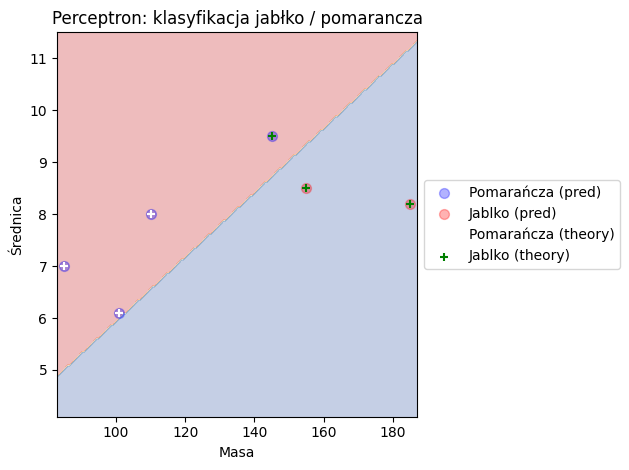

In [30]:
plot_decision_boundary(
    X_test, y_test, p,
    xlabel="Masa",
    ylabel="≈örednica",
    title="Perceptron: klasyfikacja jab≈Çko / pomarancza",
    legend=True,
    class_labels=("Pomara≈Ñcza", "Jablko")
)

Dlaczego tak siƒô dzieje?

Perceptron szuka liniowej granicy decyzyjnej
Tw√≥j zbi√≥r jab≈Çka/pomara≈Ñcze ma dwie cechy: masa i ≈õrednica. Je≈ºeli klasy nie sƒÖ idealnie liniowo separowalne, perceptron mo≈ºe siƒô ‚Äûpogubiƒá‚Äù.

Dane testowe wychodzƒÖ poza obszar trenowania
W treningu mia≈Çe≈õ jab≈Çka w zakresie ≈õrednicy ~7‚Äì8.5, a w te≈õcie pojawia siƒô jab≈Çko z ≈õrednicƒÖ 9.5.
‚Üí perceptron nie widzia≈Ç takich warto≈õci i granica decyzyjna mo≈ºe je zaklasyfikowaƒá do z≈Çej klasy.

Brak normalizacji danych
Zauwa≈º, ≈ºe pierwsza cecha (masa) jest rzƒôdu 100‚Äì200, a druga (≈õrednica) tylko 6‚Äì9.
Perceptron liczy iloczyn skalarny, wiƒôc cecha o wiƒôkszej skali dominuje w uczeniu.
To powoduje, ≈ºe ≈õrednica praktycznie nic nie wnosi, a decyzja zale≈ºy g≈Ç√≥wnie od masy.

In [7]:
from sklearn.preprocessing import StandardScaler

# ----------------------
# Normalizacja cech
# ----------------------
scaler = StandardScaler()
X_train_scaled = X_train / X_train.max()
X_test_scaled = X_test / X_train.max()

X_test_scaled

array([[0.80555556, 0.05277778],
       [0.86111111, 0.04722222],
       [1.02777778, 0.04555556],
       [0.47222222, 0.03888889],
       [0.56111111, 0.03388889],
       [0.61111111, 0.04444444]])

Predykcje: [1 1 1 0 0 0]


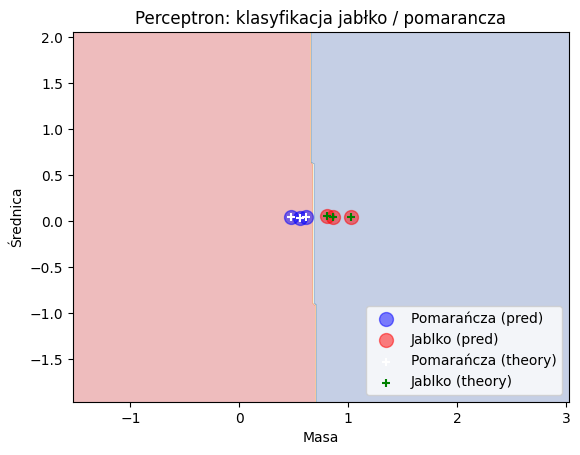

In [9]:
# ----------------------
# Trening perceptronu
# ----------------------
p = Perceptron(learning_rate=0.02, epochs=20)
p.fit(X_train_scaled, y_train)

# ----------------------
# Predykcja
# ----------------------
preds = p.predict(X_test_scaled)
print("Predykcje:", preds)




plot_decision_boundary(
    X_test_scaled, y_test, p,
    xlabel="Masa",
    ylabel="≈örednica",
    title="Perceptron: klasyfikacja jab≈Çko / pomarancza",
    legend=True,
    class_labels=("Pomara≈Ñcza", "Jablko")
)


## ƒÜwiczenie

Zastosuj model perceptronu do okre≈õlenia, czy dana osoba ma **prawid≈ÇowƒÖ wagƒô** czy **nadwagƒô**.

Do klasyfikacji wykorzystamy wska≈∫nik BMI (Body Mass Index), obliczany wed≈Çug wzoru:

$$
BMI = \frac{\text{waga [kg]}}{(\text{wzrost [m]})^2}
$$

Przyjmujemy kryterium:

* **BMI < 25 ‚Üí waga prawid≈Çowa**
* **BMI ‚â• 25 ‚Üí nadwaga**

Oczywi≈õcie wystarczy≈Çoby samo obliczanie BMI, aby przypisaƒá etykiety.
My jednak chcemy nauczyƒá perceptron rozpoznawania nadwagi **tylko na podstawie danych wej≈õciowych: wzrostu i wagi**. Dziƒôki znajomo≈õci wzoru na BMI mo≈ºemy sprawdziƒá, jak dobrze model nauczy≈Ç siƒô tego zadania.

Poni≈ºej podane sƒÖ dane wej≈õciowe. Na ich podstawie oblicz BMI, przygotuj odpowiednie etykiety (`0` ‚Äì waga prawid≈Çowa, `1` ‚Äì nadwaga), a nastƒôpnie wykorzystaj je do trenowania perceptronu.

Materia≈Çy do ƒáwiczenia: [dane](wzrost_waga.txt)


### Og√≥lniej

1. **Propagacja w prz√≥d (forward pass)**  
   Dane wej≈õciowe przechodzƒÖ przez kolejne warstwy sieci.  
   Ka≈ºdy neuron oblicza sumƒô wa≈ºonƒÖ swoich wej≈õƒá ($z = w¬∑x + b$), a nastƒôpnie przepuszcza wynik przez funkcjƒô aktywacji.  
   W ten spos√≥b powstaje coraz bardziej abstrakcyjna reprezentacja danych, a≈º do warstwy wyj≈õciowej, kt√≥ra generuje **predykcjƒô** (np. klasƒô, prawdopodobie≈Ñstwa, warto≈õƒá liczbowƒÖ).

2. **Ocena jako≈õci (loss function - funkcja straty)**  
   Predykcja jest por√≥wnywana z oczekiwanym wynikiem (tzw. etykietƒÖ (ang. _label_).  
   Funkcja straty mierzy r√≥≈ºnicƒô miƒôdzy przewidywaniami a rzeczywistym wynikiem.  
   * Przyk≈Çady:  
     * regresja ‚Üí MSE (Mean Squared Error),  
     * klasyfikacja binarna ‚Üí binary cross-entropy,  
     * klasyfikacja wieloklasowa ‚Üí categorical cross-entropy.

3. **Propagacja wsteczna (backpropagation)**  
   Na podstawie funkcji straty obliczane sƒÖ gradienty b≈Çƒôdu wzglƒôdem wag i bias√≥w w ka≈ºdej warstwie.  
   Dzia≈Ça tu **regu≈Ça ≈Ça≈Ñcuchowa z rachunku r√≥≈ºniczkowego** ‚Äì b≈ÇƒÖd ‚Äûcofa siƒô‚Äù przez sieƒá od warstwy wyj≈õciowej do wej≈õciowej.  
   Dziƒôki temu wiemy, jak ka≈ºda waga przyczyni≈Ça siƒô do powsta≈Çego b≈Çƒôdu.

4. **Aktualizacja wag (gradient descent)**  
   Optymalizator (np. **SGD**, **Adam**, **RMSProp**) zmienia wagi i biasy, przesuwajƒÖc je w kierunku, kt√≥ry zmniejsza b≈ÇƒÖd.  
   Uczy siƒô w ten spos√≥b krok po kroku, minimalizujƒÖc funkcjƒô straty.  
   * Parametr **learning rate (krok uczenia)** kontroluje, jak du≈ºe sƒÖ te zmiany.  
     Zbyt du≈ºy ‚Üí model nie zbiega.  
     Zbyt ma≈Çy ‚Üí uczenie trwa bardzo d≈Çugo.

5. **Iteracja w epokach**  
   Proces powtarza siƒô dla wszystkich przyk≈Çad√≥w w zbiorze danych.  
   - Dane czƒôsto dzielimy na **batch‚Äôe** (minipaczki), co pozwala szybciej i stabilniej uczyƒá du≈ºe modele.  
   - Po przej≈õciu ca≈Çego zbioru uczƒÖcego m√≥wimy o jednej **epoce**.  
   - Uczenie trwa zwykle wiele epok, a≈º model osiƒÖgnie satysfakcjonujƒÖcƒÖ jako≈õƒá lub zatrzymamy je wcze≈õniej (np. metodƒÖ **early stopping**).  

üëâ W skr√≥cie: sieƒá iteracyjnie **przewiduje ‚Üí ocenia ‚Üí poprawia swoje wagi**, a≈º stopniowo nauczy siƒô odwzorowywaƒá zale≈ºno≈õƒá miƒôdzy danymi wej≈õciowymi a wyj≈õciowymi.

## Gradient ‚Äì podstawy

**Gradient** to kluczowe pojƒôcie w uczeniu sieci neuronowych i og√≥lnie w optymalizacji.  
Intuicyjnie: m√≥wi, **w kt√≥rƒÖ stronƒô i jak silnie trzeba zmieniƒá parametry modelu, aby zmniejszyƒá b≈ÇƒÖd (funkcjƒô straty)**.

---

### Co to jest gradient?

* Gradient to **wektor pochodnych czƒÖstkowych** funkcji wzglƒôdem jej argument√≥w.  
  Je≈õli mamy funkcjƒô straty $L(w)$, zale≈ºnƒÖ od wielu wag $w = (w_1, w_2, \dots, w_n)$, gradient wyglƒÖda tak:

$$
\nabla L(w) = 
\left[ \frac{\partial L}{\partial w_1}, \frac{\partial L}{\partial w_2}, \dots, \frac{\partial L}{\partial w_n} \right]
$$

* Ka≈ºdy sk≈Çadnik gradientu m√≥wi, jak bardzo zmieni siƒô strata przy niewielkiej zmianie danej wagi.  
* **Kierunek gradientu** wskazuje najszybszy wzrost funkcji.  
  Dlatego w uczeniu maszynowym idziemy w przeciwnym kierunku (tzw. *gradient descent*), aby minimalizowaƒá stratƒô.

---

### Jak oblicza siƒô gradient?

1. **Pojedynczy neuron**  
   Neuron:  
   \[
   z = w \cdot x + b, \quad a = \sigma(z)
   \]
   gdzie \(\sigma\) to funkcja aktywacji.  
   Strata (np. dla jednej pr√≥bki):  
   \[
   L = \frac{1}{2} (a - y)^2
   \]

   Aby policzyƒá gradient wzglƒôdem \(w\):  
   \[
   \frac{\partial L}{\partial w} = \frac{\partial L}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial w}
   \]

   Czyli **regu≈Ça ≈Ça≈Ñcuchowa**: cofamy siƒô od straty do wag, liczƒÖc kolejne pochodne.

2. **Ca≈Ça sieƒá**  
   W sieci neuronowej obliczamy gradienty wag w ka≈ºdej warstwie stosujƒÖc algorytm **propagacji wstecznej (backpropagation)**.  
   Polega on na:
   * obliczeniu b≈Çƒôdu w warstwie wyj≈õciowej,
   * cofniƒôciu siƒô krok po kroku wstecz, u≈ºywajƒÖc regu≈Çy ≈Ça≈Ñcuchowej,
   * wyliczeniu, jak ka≈ºda waga wp≈Çynƒô≈Ça na b≈ÇƒÖd.

---

### Dlaczego gradient jest tak wa≈ºny?

* Gradient m√≥wi nam, jak poprawiaƒá parametry, aby **zmniejszaƒá b≈ÇƒÖd**.  
* To fundament wszystkich algorytm√≥w optymalizacji: **SGD, Adam, RMSProp** itp.  
* Bez gradientu nie da≈Çoby siƒô uczyƒá g≈Çƒôbokich sieci neuronowych, bo nie wiedzieliby≈õmy, w kt√≥rƒÖ stronƒô aktualizowaƒá wagi.

---

### Intuicja geometryczna

* Dla funkcji jednej zmiennej gradient to zwyk≈Ça pochodna ‚Üí nachylenie wykresu.  
* Dla wielu zmiennych gradient to wektor, kt√≥ry wskazuje kierunek najszybszego wzrostu.  
* W uczeniu sieci: chcemy znale≈∫ƒá **minimum globalne lub lokalne** funkcji straty, wiƒôc idziemy w kierunku **przeciwnym do gradientu**.

---

### Podsumowanie

* Gradient = wektor pochodnych czƒÖstkowych funkcji straty wzglƒôdem wag.  
* Obliczany za pomocƒÖ regu≈Çy ≈Ça≈Ñcuchowej (backpropagation).  
* Umo≈ºliwia uczenie siƒô sieci poprzez **iteracyjne zmniejszanie funkcji straty**.  
* Intuicyjnie: gradient m√≥wi, jak zmieniƒá parametry modelu, aby ‚Äûzej≈õƒá w d√≥≈Ç‚Äù na wykresie b≈Çƒôdu i poprawiƒá predykcjƒô.

---


## Kluczowe pojƒôcia

* **Bias‚Äìvariance tradeoff**  
  R√≥wnowaga miƒôdzy prostotƒÖ modelu a jego z≈Ço≈ºono≈õciƒÖ:  
  * du≈ºy **bias** ‚Üí model zbyt prosty, ryzyko niedouczenia (*underfitting*),  
  * du≈ºa **wariancja** ‚Üí model zbyt z≈Ço≈ºony, ryzyko przeuczenia (*overfitting*).  
  Celem jest znalezienie punktu po≈õredniego, w kt√≥rym model dobrze generalizuje na nowych danych.

* **Regularizacja**  
  Zestaw technik ograniczajƒÖcych przeuczenie (*overfitting*):  
  * **L1/L2 (ridge, lasso)** ‚Äì kary za du≈ºe wagi, co ‚Äûwyg≈Çadza‚Äù model,  
  * **Dropout** ‚Äì losowe wy≈ÇƒÖczanie czƒô≈õci neuron√≥w w trakcie uczenia,  
  * **Early stopping** ‚Äì zatrzymanie treningu, gdy dok≈Çadno≈õƒá na zbiorze walidacyjnym przestaje siƒô poprawiaƒá.  

* **Batch i epoch**  
  * **Batch** ‚Äì porcja danych uczƒÖcych, na kt√≥rej wykonywana jest jedna aktualizacja wag,  
  * **Mini-batch** ‚Äì najczƒô≈õciej stosowana forma (np. 32, 64 przyk≈Çady na batch),  
  * **Epoch** ‚Äì jedno pe≈Çne przej≈õcie przez ca≈Çy zbi√≥r danych.  
  Dziƒôki batchom uczenie jest bardziej wydajne i stabilne numerycznie.

* **Uczenie nadzorowane vs. nienadzorowane**  
  * **Nadzorowane** ‚Äì dane wej≈õciowe majƒÖ etykiety (np. zdjƒôcia + klasy obiekt√≥w); model uczy siƒô przewidywaƒá znane wyj≈õcia.  
  * **Nienadzorowane** ‚Äì brak etykiet; model sam szuka struktury w danych (np. grupowanie, redukcja wymiar√≥w).

* **Uczenie p√≥≈Çnadzorowane i samonadzorowane**  
  Po≈õrednie podej≈õcia:  
  * **P√≥≈Çnadzorowane** ‚Äì czƒô≈õƒá danych ma etykiety, czƒô≈õƒá nie (np. etykietowanie tylko fragmentu zbioru),  
  * **Samonadzorowane** ‚Äì model uczy siƒô z samych danych, np. przewidujƒÖc brakujƒÖce fragmenty (czƒôsto stosowane w NLP i wizji komputerowej).

* **Overfitting i underfitting**  
  * **Underfitting** ‚Äì model za prosty, nie uczy siƒô dobrze nawet na zbiorze treningowym,  
  * **Overfitting** ‚Äì model dopasowany zbyt mocno do danych treningowych, traci zdolno≈õƒá generalizacji na nowych danych.  
  W praktyce stosuje siƒô techniki regularizacji, walidacjƒô krzy≈ºowƒÖ i odpowiedni dob√≥r architektury, aby tego uniknƒÖƒá.

* **Walidacja i testowanie**  
  Dane dzieli siƒô na:  
  * **Zbi√≥r treningowy** ‚Äì do uczenia,  
  * **Zbi√≥r walidacyjny** ‚Äì do strojenia hiperparametr√≥w i kontroli przeuczenia,  
  * **Zbi√≥r testowy** ‚Äì do ostatecznej oceny jako≈õci modelu.  

* **Learning rate (krok uczenia)**  
  Okre≈õla, jak du≈ºe kroki wykonuje optymalizator podczas aktualizacji wag.  
  Zbyt du≈ºy ‚Üí model siƒô nie uczy (oscyluje),  
  Zbyt ma≈Çy ‚Üí uczy siƒô bardzo wolno.  
  Czƒôsto stosuje siƒô techniki adaptacyjne (Adam, RMSProp) lub harmonogramy uczenia (learning rate schedule).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Dane ---
x = 2        # wej≈õcie
y = 5        # prawdziwa etykieta

# Parametry poczƒÖtkowe
w = 1.0
b = 0.0
lr = 0.1     # learning rate

# --- Forward pass ---
z = w * x + b
y_hat = z
L = 0.5 * (y_hat - y) ** 2

# --- Gradienty ---
dL_dyhat = (y_hat - y)
dL_dw = dL_dyhat * x
dL_db = dL_dyhat * 1

# --- Aktualizacja ---
w_new = w - lr * dL_dw
b_new = b - lr * dL_db

# --- Wykres funkcji straty wzglƒôdem w ---
w_values = np.linspace(-1, 4, 200)
loss_values = [0.5 * ((w_i * x + b) - y) ** 2 for w_i in w_values]

plt.figure(figsize=(7,5))
plt.plot(w_values, loss_values, label="Funkcja straty L(w)")

# Punkt poczƒÖtkowy
plt.scatter(w, L, color="red", s=80, label=f"Start (w={w}, L={L:.2f})")

# Punkt po aktualizacji
L_new = 0.5 * ((w_new * x + b_new) - y) ** 2
plt.scatter(w_new, L_new, color="green", s=80, label=f"Po kroku GD (w={w_new:.2f})")

# Strza≈Çka ruchu gradient descent
plt.arrow(w, L, w_new - w, L_new - L,
          head_width=0.1, head_length=0.2, fc="black", ec="black")

plt.xlabel("w")
plt.ylabel("L(w)")
plt.title("Jeden krok gradient descent")
plt.legend()
plt.grid(True)
plt.show()


## Czym jest Deep Learning

Deep learning (g≈Çƒôbokie uczenie) to ga≈ÇƒÖ≈∫ uczenia maszynowego, 
w kt√≥rej model uczy siƒô reprezentacji danych poprzez wiele warstw 
przekszta≈Çce≈Ñ. W praktyce oznacza to trenowanie g≈Çƒôbokich sieci 
neuronowych na du≈ºych zbiorach danych, aby automatycznie wydobywaƒá 
cechy i wzorce potrzebne do klasyfikacji, regresji czy generowania.


## Anatomia sztucznej sieci neuronowej

- **Neuron**: prosta funkcja liczƒÖca zsumowane wej≈õcia, 
  wa≈ºona parametrami (wagami) i przesuniƒôciem (biasem), 
  a nastƒôpnie przepuszczajƒÖca wynik przez nieliniowƒÖ funkcjƒô aktywacji.
- **Warstwa**: zbi√≥r neuron√≥w przetwarzajƒÖcych r√≥wnolegle ten sam 
  wektor wej≈õciowy. Warstwy ukryte pozwalajƒÖ modelowi budowaƒá hierarchiƒô 
  reprezentacji (np. z pikseli ‚Üí krawƒôdzie ‚Üí kszta≈Çty).
- **G≈Çƒôboko≈õƒá**: liczba kolejnych warstw, kt√≥re dane muszƒÖ przej≈õƒá. 
  Im wiƒôcej warstw, tym bardziej z≈Ço≈ºone zale≈ºno≈õci mo≈ºna uchwyciƒá, 
  choƒá ro≈õnie koszt oblicze≈Ñ i ryzyko przeuczenia.


## Jak przebiega uczenie

1. **Forward pass**: dane wej≈õciowe przechodzƒÖ kolejno przez warstwy, 
   a≈º do prognozy na wyj≈õciu.
2. **Funkcja straty**: por√≥wnuje prognozƒô z oczekiwanƒÖ etykietƒÖ 
   i wylicza skalarny b≈ÇƒÖd.
3. **Backpropagation**: oblicza pochodne funkcji straty wzglƒôdem ka≈ºdej 
   wagi, cofajƒÖc siƒô warstwa po warstwie (regu≈Ça ≈Ça≈Ñcuchowa).
4. **Aktualizacja**: optymalizator (np. SGD, Adam) modyfikuje wagi, 
   aby zmniejszyƒá b≈ÇƒÖd w kolejnych iteracjach.
5. **Pƒôtla treningowa**: kroki 1-4 powtarzamy dla wielu przyk≈Çad√≥w i epok, 
   stopniowo poprawiajƒÖc wyniki modelu.


In [ ]:
import torch
from torch import nn

# Minimalny przyk≈Çad: klasyfikacja binarna przy u≈ºyciu perceptronu
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid(),
)

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Przyk≈Çadowe dane (XOR, dla ilustracji)
inputs = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
targets = torch.tensor([[0.], [1.], [1.], [0.]])

for epoch in range(2000):
    preds = model(inputs)
    loss = criterion(preds, targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print('Przyk≈Çadowa strata:', loss.item())


## Kiedy siƒôgaƒá po deep learning

- Gdy dysponujemy du≈ºƒÖ ilo≈õciƒÖ danych i ciƒô≈ºko rƒôcznie zaprojektowaƒá 
  cechy opisujƒÖce problem (np. obraz, d≈∫wiƒôk, tekst).
- Gdy tradycyjne modele p≈Çytkie (np. regresje, drzewa) nie osiƒÖgajƒÖ 
  satysfakcjonujƒÖcych wynik√≥w.
- Gdy wa≈ºna jest mo≈ºliwo≈õƒá dalszego ulepszania modelu dziƒôki 
  transfer learningowi lub dopasowaniu architektury (CNN, RNN, 
  transformatory).
- Zawsze pamiƒôtaj o walidacji i monitorowaniu, poniewa≈º 
  g≈Çƒôbokie modele sƒÖ wra≈ºliwe na jako≈õƒá danych i dob√≥r hiperparametr√≥w.
